# SGD in Pytorch

In [48]:
%matplotlib inline
import torch
from matplotlib import pyplot as plt

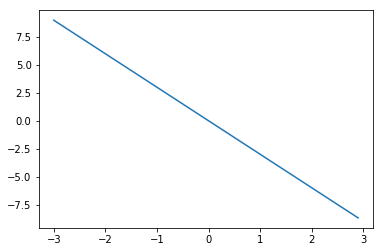

In [49]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3*X
plt.plot(X.numpy(), f.numpy())
plt.show()

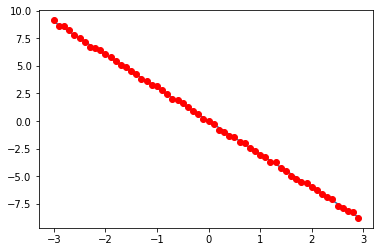

In [50]:
# Add random noise
Y = f + 0.1*torch.randn(X.size())

plt.plot(X.numpy(), f.numpy())
plt.plot(X.numpy(), Y.numpy(),'ro')
plt.show()

In [51]:
def forward(x):
    y = w*x + b
    return y

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

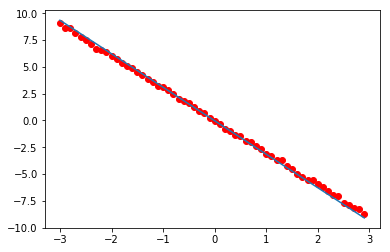

In [52]:
EPOCHS = 10

lr = 0.1
LOSS1 = []

for epoch in range(EPOCHS+1):
    Yhat = forward(X)
    # calculate loss
    LOSS1.append(criterion(Yhat, Y))
    for x, y in zip(X, Y):
        yhat = forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        w.data = w.data - lr*(w.grad.data)
        w.grad.data.zero_()
    
        b.data = b.data - lr*(b.grad.data)
        b.grad.data.zero_()
        
plt.plot(X.numpy(), Y.numpy(),'ro')
plt.plot(X.numpy(), Yhat.data.numpy())
plt.show()
    

In [53]:
LOSS1

[tensor(519.1970, grad_fn=<MeanBackward1>),
 tensor(81.7127, grad_fn=<MeanBackward1>),
 tensor(18.1906, grad_fn=<MeanBackward1>),
 tensor(4.9979, grad_fn=<MeanBackward1>),
 tensor(0.9217, grad_fn=<MeanBackward1>),
 tensor(0.4090, grad_fn=<MeanBackward1>),
 tensor(0.0640, grad_fn=<MeanBackward1>),
 tensor(0.0907, grad_fn=<MeanBackward1>),
 tensor(0.0440, grad_fn=<MeanBackward1>),
 tensor(0.0588, grad_fn=<MeanBackward1>),
 tensor(0.0497, grad_fn=<MeanBackward1>)]